In [1]:
cd C:/Users/KimTaegwan/Documents/BigContest

[WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/KimTaegwan/Documents/BigContest'
C:\Users\user\Downloads\챌린지리그\챌린지리그\10.08 모델링


In [2]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np

#test and score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler

import random as rd
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#(9/27 변수디풀트 +(신용카드,신용등급 one-hot 인코딩))
Train = pd.read_csv("final.csv",encoding='EUC-KR') 

In [4]:
Train.loc[:, Train.isnull().any()]

,CHLD_AGE_10s,CHLD_AGE_29s,YEAR08-09_@
0,1.0,0.0,NaN
1,1.0,1.0,NaN
2,1.0,1.0,NaN
3,0.0,0.0,NaN
4,1.0,0.0,NaN
5,0.0,0.0,NaN
6,1.0,0.0,NaN
7,1.0,0.0,NaN
8,0.0,0.0,NaN
9,1.0,0.0,NaN


In [5]:
#위에서 Nan을 포함하는 변수 지워주기
Train = Train.drop(labels=(["CHLD_AGE_10s","CHLD_AGE_29s","YEAR08-09_@"]),axis=1)

In [6]:
Train.loc[:,np.isinf(Train).any()]

,RATIO_30OVDU_RATE
0,0.00000
1,0.00000
2,0.00000
3,0.00000
4,0.00000
5,0.00000
6,0.17284
7,0.00000
8,0.00000
9,0.00000


In [7]:
#위에서 Inf을 포함하는 변수 지워주기
Train = Train.drop(labels=(["RATIO_30OVDU_RATE"]),axis=1)

In [8]:
X = Train.drop("TARGET",axis=1)
X = X.drop("CUST_ID",axis=1)
Y = Train["TARGET"]



In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)

In [10]:
#랜덤오버샘플링
ros = RandomOverSampler(random_state=0)
X_train, Y_train = ros.fit_sample(X_train, Y_train)
X_train= pd.DataFrame(X_train)
X_train.columns = X_val.columns.copy()

In [11]:
print(sorted(Counter(Y_train).items()))

[(0, 67261), (1, 67261)]


In [10]:
#f1_score 만들기
def xgb_f1(y,t):
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y] # binaryzing your output
    return 'f1',f1_score(t,y_bin)

#Xgboost Matrix
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_val, label=Y_val)



In [11]:
# 랜덤오버샘플링 한 데이터셋들 아래에 있는 modelfit 함수에 적용시키기 위해서 다시 합침.
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)
X_train = pd.DataFrame(X_train)
Y_train.columns = ["TARGET"]
X_val = pd.DataFrame(X_val)
train = pd.concat([X_train,Y_train], axis=1, ignore_index=True)
train.columns=np.concatenate((X_train.columns.values,["TARGET"]))
test = pd.concat([X_val,Y_val], axis=1, ignore_index=True)
test.columns=np.concatenate((X_val.columns.values,["TARGET"]))


In [12]:
target = 'TARGET'
IDcol = 'CUST_ID'

In [13]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            feval=xgb_f1, maximize=True,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['TARGET'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['TARGET'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['TARGET'], dtrain_predprob))
    print ("F1 Score : %.4g" % metrics.f1_score(dtrain['TARGET'].values, dtrain_predictions))    

In [14]:
predictors = [x for x in train.columns if x not in [target, IDcol]]

In [31]:
#Choose all predictors except target & IDcols
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-2,
 scale_pos_weight=1,
 seed=27,
silent=False)
modelfit(xgb1, train, predictors)


Model Report
Accuracy : 0.9883
AUC Score (Train): 0.999121
F1 Score : 0.9882


In [ ]:
#modelfit 함수는 적절한 반복 횟수를 찾기 위해서 씀.

In [34]:
xgb1.n_estimators 

310

In [18]:
param_test1 = {
 'max_depth':range(5,12,2),
 'min_child_weight':range(1,8,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=310, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=False), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99575, std: 0.00850, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.99567, std: 0.00866, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.99566, std: 0.00867, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.99564, std: 0.00872, params: {'max_depth': 5, 'min_child_weight': 7},
  mean: 0.99585, std: 0.00830, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.99578, std: 0.00845, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.99581, std: 0.00837, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.99589, std: 0.00821, params: {'max_depth': 7, 'min_child_weight': 7},
  mean: 0.99605, std: 0.00790, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.99605, std: 0.00790, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.99607, std: 0.00787, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: 0.99605, std: 0.00790, params: {'max_depth': 9, 'min_child_weight': 7},
  mean: 0.99622, std: 0.00755, params: {

In [62]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=310, max_depth=11,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=False), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000002889216EA90>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost-0.6-py3.6.egg\xgboost\core.py", line 366, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99622, std: 0.00755, params: {'gamma': 0.0},
  mean: 0.99622, std: 0.00755, params: {'gamma': 0.1},
  mean: 0.99624, std: 0.00752, params: {'gamma': 0.2},
  mean: 0.99625, std: 0.00750, params: {'gamma': 0.3},
  mean: 0.99614, std: 0.00771, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.99624993417887064)

In [63]:
param_test2 = {
 'max_depth':[11,12,13],
 'min_child_weight':[1,2]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=310, max_depth=11,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=False), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99622, std: 0.00755, params: {'max_depth': 11, 'min_child_weight': 1},
  mean: 0.99619, std: 0.00763, params: {'max_depth': 11, 'min_child_weight': 2},
  mean: 0.99632, std: 0.00735, params: {'max_depth': 12, 'min_child_weight': 1},
  mean: 0.99615, std: 0.00769, params: {'max_depth': 12, 'min_child_weight': 2},
  mean: 0.99625, std: 0.00750, params: {'max_depth': 13, 'min_child_weight': 1},
  mean: 0.99610, std: 0.00781, params: {'max_depth': 13, 'min_child_weight': 2}],
 {'max_depth': 12, 'min_child_weight': 1},
 0.99632256112377715)

In [59]:
pred=gsearch1.predict(X_val)

In [66]:
pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [18]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=12,
 min_child_weight=1,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 silent=False)
modelfit(xgb2, train, predictors)


Model Report
Accuracy : 1
AUC Score (Train): 1.000000
F1 Score : 1


In [19]:
xgb2.n_estimators

399

In [17]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=399, max_depth=12,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=False), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99984, std: 0.00010, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.99987, std: 0.00008, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.99988, std: 0.00009, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.99990, std: 0.00006, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.99980, std: 0.00014, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.99988, std: 0.00008, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.99989, std: 0.00009, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.99985, std: 0.00011, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.99988, std: 0.00008, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.99985, std: 0.00012, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.99983, std: 0.00013, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.99987, std: 0.00012, params: {'colsample_bytree': 0.8, 'subsample'

In [18]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,105,5)],
 'colsample_bytree':[i/100.0 for i in range(50,70,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=399, max_depth=12,
 min_child_weight=1, gamma=0.3, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=False), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99989, std: 0.00007, params: {'colsample_bytree': 0.5, 'subsample': 0.85},
  mean: 0.99991, std: 0.00006, params: {'colsample_bytree': 0.5, 'subsample': 0.9},
  mean: 0.99987, std: 0.00011, params: {'colsample_bytree': 0.5, 'subsample': 0.95},
  mean: 0.99991, std: 0.00007, params: {'colsample_bytree': 0.5, 'subsample': 1.0},
  mean: 0.99986, std: 0.00011, params: {'colsample_bytree': 0.55, 'subsample': 0.85},
  mean: 0.99988, std: 0.00007, params: {'colsample_bytree': 0.55, 'subsample': 0.9},
  mean: 0.99994, std: 0.00005, params: {'colsample_bytree': 0.55, 'subsample': 0.95},
  mean: 0.99988, std: 0.00009, params: {'colsample_bytree': 0.55, 'subsample': 1.0},
  mean: 0.99987, std: 0.00010, params: {'colsample_bytree': 0.6, 'subsample': 0.85},
  mean: 0.99990, std: 0.00006, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.99990, std: 0.00008, params: {'colsample_bytree': 0.6, 'subsample': 0.95},
  mean: 0.99988, std: 0.00008, params: {'colsample_bytree': 0.6, '

In [19]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=399, max_depth=12,
 min_child_weight=1, gamma=0.3, subsample=0.95, colsample_bytree=0.55,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=False), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99993, std: 0.00005, params: {'reg_alpha': 1e-05},
  mean: 0.99990, std: 0.00008, params: {'reg_alpha': 0.01},
  mean: 0.99988, std: 0.00007, params: {'reg_alpha': 0.1},
  mean: 0.99986, std: 0.00010, params: {'reg_alpha': 1},
  mean: 0.98438, std: 0.00068, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.99993252756758721)

In [15]:
param_test7 = {
 'reg_alpha':[1e-6,5*(1e-6),1e-5,5*(1e-5),1e-4]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=399, max_depth=12,
 min_child_weight=1, gamma=0.3, subsample=0.95, colsample_bytree=0.55,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=False), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92759, std: 0.00488, params: {'reg_alpha': 1e-06},
  mean: 0.92776, std: 0.00456, params: {'reg_alpha': 4.9999999999999996e-06},
  mean: 0.92802, std: 0.00446, params: {'reg_alpha': 1e-05},
  mean: 0.92812, std: 0.00479, params: {'reg_alpha': 5e-05},
  mean: 0.92806, std: 0.00450, params: {'reg_alpha': 0.0001}],
 {'reg_alpha': 5e-05},
 0.92811878726075814)

In [112]:

fullset = pd.concat([train, test], axis = 0, ignore_index=True)
fullset.columns = np.concatenate((X_train.columns.values,["TARGET"]))

In [113]:
fullX = fullset.drop("TARGET",axis=1)
fullY = fullset["TARGET"]
dfull = xgb.DMatrix(fullX, label=fullY)

In [114]:
fullset.head()

,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,...,61,62,63,64,65,66,67,68,69,TARGET
0,2.8,1.0,1.000000,1.0,1.081489,1.000000,1.085815,1.000000,1.00000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,2.8,1.0,1.000000,1.0,1.814889,1.000000,1.858059,1.000000,1.00000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,2.8,6.4,4.857143,1.0,1.407445,1.000000,1.314628,1.358833,1.00000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,2.8,2.8,2.285714,1.0,1.814889,1.787735,1.829458,1.000030,1.07438,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,2.8,1.0,1.000000,1.0,1.353119,1.000000,1.371831,1.000000,1.00000,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [14]:
xgb_param = {
         'max_depth':12, 
         'eta':0.1,  
         'silent':False,
         'objective':'binary:logistic',
    'gamma' : 0.3,
    'min_child_weight' : 1,
    'max_delta_step' : 0,
    'subsample' : 0.8,
    'colsample_bytree' : 0.8,
    'base_score' : 0.5,
    'nthread' : 2
         }

plst = xgb_param.items()

evallist  = [(dtrain,'train')]

num_round = 300  # 반복횟수
#bst = xgb.train(xgb_param,dtrain, num_round,
#                  feval=xgb_f1,maximize=True,verbose_eval=True)

bst = xgb.train(xgb_param,dtrain, num_round,
                  verbose_eval=True)

In [15]:
for th in range(0,100):
    pred = bst.predict(dtest)
    for i in range(0,30070):
        if pred[i]>(th/100):
            pred[i]=1
        else:
            pred[i]=0
    fs = f1_score(pred,Y_val)
    print("Threshold가 {a}일때 F1_score는 {b}".format(a=th/100, b=fs))

Threshold가 0.0일때 F1_score는 0.08171988134349781
Threshold가 0.01일때 F1_score는 0.3631225715294949
Threshold가 0.02일때 F1_score는 0.41806393919069973
Threshold가 0.03일때 F1_score는 0.4398782343987823
Threshold가 0.04일때 F1_score는 0.4548217739707101
Threshold가 0.05일때 F1_score는 0.46975088967971534
Threshold가 0.06일때 F1_score는 0.4805477746654218
Threshold가 0.07일때 F1_score는 0.48456992777413005
Threshold가 0.08일때 F1_score는 0.4911323328785811
Threshold가 0.09일때 F1_score는 0.4873710423336891
Threshold가 0.1일때 F1_score는 0.4856933235509905
Threshold가 0.11일때 F1_score는 0.48464163822525597
Threshold가 0.12일때 F1_score는 0.4851063829787234
Threshold가 0.13일때 F1_score는 0.4779674473997619
Threshold가 0.14일때 F1_score는 0.472771278741428
Threshold가 0.15일때 F1_score는 0.4691865242399343
Threshold가 0.16일때 F1_score는 0.47147022074135775
Threshold가 0.17일때 F1_score는 0.4697357203751065
Threshold가 0.18일때 F1_score는 0.4663482414242293
Threshold가 0.19일때 F1_score는 0.4634361233480176
Threshold가 0.2일때 F1_score는 0.45851917930419267
Threshold가

In [45]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
          metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['TARGET'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['TARGET'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['TARGET'], dtrain_predprob))
    print ("F1 Score : %.4g" % metrics.f1_score(dtrain['TARGET'].values, dtrain_predictions))    

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001D614DE7CF8>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost-0.6-py3.6.egg\xgboost\core.py", line 360, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=12,
 min_child_weight=1,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=2,
 scale_pos_weight=1,
 seed=27,
 silent=False)
modelfit(xgb2, train, predictors)

In [ ]:
#파라메터 튜닝을 하던 이전 방식으로는 f1_score의 threshold가 0.5로 되어있음.
xgb2.n_estimator

In [101]:
#샘플링 랜덤 오버 샘플링 vs SMOTE

In [21]:
xgb_param = {
         'max_depth':12, 
         'eta':0.1,  
         'silent':False,
         'objective':'binary:logistic',
    'gamma' : 0.3,
    'min_child_weight' : 1,
    'max_delta_step' : 0,
    'subsample' : 0.8,
    'colsample_bytree' : 0.8,
    'base_score' : 0.5,
    'nthread' : 2
         }

plst = xgb_param.items()

evallist  = [(dtrain,'train')]

num_round = 399  # 반복횟수
bst = xgb.train(xgb_param,dtrain, num_round,
                 feval=xgb_f1,maximize=True,verbose_eval=True)

In [14]:
for th in range(0,70):
    pred = bst.predict(dtest)
    for i in range(0,30070):
        if pred[i]>(th/100):
            pred[i]=1
        else:
            pred[i]=0
    fs = f1_score(pred,Y_val)
    print("Threshold가 {a}일때 F1_score는 {b}".format(a=th/100, b=fs))

Threshold가 0.0일때 F1_score는 0.08135268782899983
Threshold가 0.01일때 F1_score는 0.2964730840625828
Threshold가 0.02일때 F1_score는 0.34394064303380056
Threshold가 0.03일때 F1_score는 0.3723024957778195
Threshold가 0.04일때 F1_score는 0.38691088701378884
Threshold가 0.05일때 F1_score는 0.40396912899669235
Threshold가 0.06일때 F1_score는 0.4150767798976268
Threshold가 0.07일때 F1_score는 0.4265887509130752
Threshold가 0.08일때 F1_score는 0.4357342835327055
Threshold가 0.09일때 F1_score는 0.4409905163329821
Threshold가 0.1일때 F1_score는 0.44589450788471996
Threshold가 0.11일때 F1_score는 0.44438233650083847
Threshold가 0.12일때 F1_score는 0.44763271162123386
Threshold가 0.13일때 F1_score는 0.44961697112551563
Threshold가 0.14일때 F1_score는 0.45716015743263694
Threshold가 0.15일때 F1_score는 0.4602977667493796
Threshold가 0.16일때 F1_score는 0.46285172304773947
Threshold가 0.17일때 F1_score는 0.46774193548387094
Threshold가 0.18일때 F1_score는 0.46969696969696967
Threshold가 0.19일때 F1_score는 0.4707464694014795
Threshold가 0.2일때 F1_score는 0.4701467076083248
Thre

In [ ]:
bst.save_model('0001.model')

In [ ]:
bst.load_model("model.bin")

In [14]:
Testfinal = pd.read_csv("Test_final.csv",encoding='EUC-KR') 

In [15]:
Testfinal.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,60,61,62,63,64,65,66,67,68,69
0,100,,2.8,2.8,2.285714,1.0,1.842052,1.135824,1.743653,1.448533,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,188,,2.8,1.0,1.000000,1.0,1.162978,1.162987,1.171620,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,269,,1.0,2.8,2.285714,1.0,1.054326,1.054335,1.000000,1.179431,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,323,,1.0,1.0,2.285714,2.5,1.081489,1.081498,1.000000,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,397,,1.0,1.0,2.285714,2.5,2.222334,1.000000,1.000000,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
#Nan과 Inf를 포함하는 변수 지우기
Testfinal = Testfinal.drop(labels=(["CHLD_AGE_10s","CHLD_AGE_29s","YEAR08-09_@","RATIO_30OVDU_RATE"]),axis=1)


In [19]:
Testfinal = Testfinal.drop(labels=(["CUST_ID","TARGET"]),axis=1)

In [28]:
Testfinal.head()

,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,...,60,61,62,63,64,65,66,67,68,69
0,2.8,2.8,2.285714,1.0,1.842052,1.135824,1.743653,1.448533,1.966942,1.966942,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.8,1.0,1.000000,1.0,1.162978,1.162987,1.171620,1.000000,1.966942,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,2.8,2.285714,1.0,1.054326,1.054335,1.000000,1.179431,1.074380,1.074380,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,2.285714,2.5,1.081489,1.081498,1.000000,1.000000,4.644628,4.644628,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,2.285714,2.5,2.222334,1.000000,1.000000,1.000000,1.074380,10.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
dTestfinal = xgb.DMatrix(Testfinal)

In [71]:
pred = bst.predict(dTestfinal)

In [72]:
pred.shape

(2019,)

In [20]:
xgb_param = {
         'max_depth':12, 
         'eta':0.1,  
         'silent':False,
         'objective':'binary:logistic',
    'gamma' : 0.3,
    'min_child_weight' : 1,
    'max_delta_step' : 0,
    'subsample' : 0.8,
    'colsample_bytree' : 0.8,
    'base_score' : 0.5,
    'nthread' : 2
         }

plst = xgb_param.items()

evallist  = [(dfull,'full')]

num_round = 300  # 반복횟수
bst = xgb.train(xgb_param,dfull, num_round,
                 feval=xgb_f1,maximize=True,verbose_eval=True)

NameError: name 'dfull' is not defined

In [116]:
pred = bst.predict(dTestfinal)


In [117]:

for i in range(0,2019):
    if pred[i]>(17/100):
        pred[i]=1
    else:
        pred[i]=0

In [104]:
pred.shape

(2019,)

In [118]:
Answer_s = pd.read_excel("Answer_sheet.xlsx",encoding='EUC-KR')
Answer_s.TARGET = pred
writer = pd.ExcelWriter('0929Answer_sheet.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Answer_s.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

#### ROC Curve

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pylab as pl

In [93]:
# Determine the false positive and true positive rates
fpr, tpr, thresholds = roc_curve(Y_val, bst.predict(dtest))

ROC AUC: 0.93


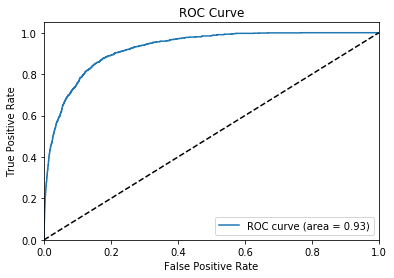

In [40]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [56]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.loc[(roc.tf-0).abs().argsort()[:1]]


,1-fpr,fpr,tf,thresholds,tpr
1350,0.848029,0.151971,0.000598,0.014241,0.848627


In [70]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [71]:

average_precision = average_precision_score(Y_val, bst.predict(dtest))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.47


##### Opimize f1 score 

In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
precision, recall, thresholds = precision_recall_curve(Y_val, bst.predict(dtest))

In [25]:
i = np.arange(len(precision[:-2]))# index for df
#f1 : precision과 recall의 조화 평균
roc = pd.DataFrame({'Precision' : pd.Series(precision[:-2], index=i),'recall' : pd.Series(recall[:-2], index = i), 
                    'f1' : pd.Series(((2*precision[:-2]*recall[:-2])/(precision[:-2]+recall[:-2])), index = i), 
                    'thresholds' : pd.Series(thresholds[:-1], index = i)})

In [26]:
roc.loc[roc.f1==roc.f1.max()]

,Precision,f1,recall,thresholds
25636,0.438911,0.492208,0.560237,0.147346


In [192]:
# n = 300 
#Precision	f1	recall	thresholds
#0.437028	0.484806	0.544314	0.168189

#n n=399
#Precision	f1	recall	thresholds
#0.438911	0.492208	0.560237	0.147346